# Stage 04: Reinforcement Learning

**Submitted by:** Muhammad Abdur Rehman, Oluwasola Michael, Oghenerukevwe Omatie Adiohwo

The aim of this stage is to reproduce the results of the paper, ["Machine Learning Prediction of Cancer Cell Sensitivity to Drugs Based on Genomic and Chemical Properties."](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0061318)

The dataset was obtained from [Genomics in Drug Discovery and Cancer](https://www.cancerrxgene.org/downloads/bulk_download)

Loading the dataset

In [32]:
import pandas as pd

In [33]:
#Load the xlsx file
df = pd.read_excel('df.xlsx')

Since the dataframe contains enormous number of genes, we only needed to select the one that spans more than 500 rows. But the largest times a gene appeared in this dataset was 402, so we had to select that instead.

In [34]:
# Counting the occurrences of each cell line name
cell_line_counts = df['CELL_LINE_NAME'].value_counts()

# Filter to get only the names that appear more than 400 times
frequent_cell_lines = cell_line_counts[cell_line_counts > 400].index

# Keep only the rows with those frequent cell line names
df1 = df[df['CELL_LINE_NAME'].isin(frequent_cell_lines)]

df1

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
86,GDSC1,342,15646269,905955,SK-MEL-2,SIDM00082,SKCM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.394001,0.985284,0.032859,0.785492
474,GDSC1,342,15646572,905955,SK-MEL-2,SIDM00082,SKCM,3,Rapamycin,MTORC1,PI3K/MTOR signaling,1045,Y,0.000391,0.1,-1.113085,0.945620,0.135881,0.569712
837,GDSC1,342,15646643,905955,SK-MEL-2,SIDM00082,SKCM,5,Sunitinib,"PDGFR, KIT, VEGFR, FLT3, RET, CSF1R",RTK signaling,1045,Y,0.031250,8.0,4.013588,0.970974,0.068558,0.945589
1234,GDSC1,342,15646658,905955,SK-MEL-2,SIDM00082,SKCM,6,PHA-665752,MET,RTK signaling,1045,Y,0.007813,2.0,3.092390,0.980721,0.119597,0.396507
1640,GDSC1,342,15646669,905955,SK-MEL-2,SIDM00082,SKCM,9,MG-132,"Proteasome, CAPN1",Protein stability and degradation,1045,Y,0.003906,1.0,2.369072,0.980196,0.070962,1.688235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329242,GDSC1,342,15646465,905955,SK-MEL-2,SIDM00082,SKCM,1526,Refametinib,"MEK1, MEK2",ERK MAPK signaling,1046,Y,0.019531,5.0,-1.542607,0.441238,0.088111,-1.916767
330105,GDSC1,342,15646466,905955,SK-MEL-2,SIDM00082,SKCM,1527,Pictilisib,PI3K (class 1),PI3K/MTOR signaling,1046,Y,0.015625,4.0,1.439194,0.872167,0.081591,0.455946
330945,GDSC1,342,15646467,905955,SK-MEL-2,SIDM00082,SKCM,1529,Pevonedistat,NAE,Other,1046,Y,0.003906,1.0,-0.809756,0.782186,0.048353,-0.676150
331660,GDSC1,342,15646469,905955,SK-MEL-2,SIDM00082,SKCM,1530,PFI-3,"PB1, SMARCA4, SMARCA2",Chromatin other,1025,Y,0.039063,10.0,5.665698,0.991941,0.028880,1.827492


In [35]:
# Reset the index of the DataFrame and drop the old index
df1 = df1.reset_index(drop=True)

In [36]:
# Selecting only the desired columns
filtered_df = df1[['CELL_LINE_NAME', 'TCGA_DESC', 'DRUG_NAME', 'LN_IC50']]

filtered_df

,CELL_LINE_NAME,TCGA_DESC,DRUG_NAME,LN_IC50
0,SK-MEL-2,SKCM,Erlotinib,3.394001
1,SK-MEL-2,SKCM,Rapamycin,-1.113085
2,SK-MEL-2,SKCM,Sunitinib,4.013588
3,SK-MEL-2,SKCM,PHA-665752,3.092390
4,SK-MEL-2,SKCM,MG-132,2.369072
...,...,...,...,...
397,SK-MEL-2,SKCM,Refametinib,-1.542607
398,SK-MEL-2,SKCM,Pictilisib,1.439194
399,SK-MEL-2,SKCM,Pevonedistat,-0.809756
400,SK-MEL-2,SKCM,PFI-3,5.665698


## Generating SMILES using the drug name

In [38]:
! pip install PubChemPy

In [39]:
import pandas as pd
import pubchempy as pcp

# Defining a function to get SMILES from PubChem using the compound name
def get_smiles(drug_name):
    try:
        compound = pcp.get_compounds(drug_name, 'name')
        if compound:
            return compound[0].canonical_smiles
        else:
            return None
    except:
        return None

# Apply the function to the DRUG_NAME column to create a new SMILES column
filtered_df['SMILES'] = filtered_df['DRUG_NAME'].apply(get_smiles)

# Save the updated DataFrame with SMILES to a new Excel file (optional)
filtered_df.to_excel('filtered_df_with_smiles.xlsx', index=False)

# Display the updated DataFrame
filtered_df

,CELL_LINE_NAME,TCGA_DESC,DRUG_NAME,LN_IC50,SMILES
0,SK-MEL-2,SKCM,Erlotinib,3.394001,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1,SK-MEL-2,SKCM,Rapamycin,-1.113085,CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...
2,SK-MEL-2,SKCM,Sunitinib,4.013588,CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...
3,SK-MEL-2,SKCM,PHA-665752,3.092390,CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...
4,SK-MEL-2,SKCM,MG-132,2.369072,CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...
...,...,...,...,...,...
397,SK-MEL-2,SKCM,Refametinib,-1.542607,COC1=CC(=C(C(=C1NS(=O)(=O)C2(CC2)CC(CO)O)NC3=C...
398,SK-MEL-2,SKCM,Pictilisib,1.439194,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
399,SK-MEL-2,SKCM,Pevonedistat,-0.809756,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
400,SK-MEL-2,SKCM,PFI-3,5.665698,C1C2CN(C1CN2C3=CC=CC=N3)C=CC(=O)C4=CC=CC=C4O


## Remove rows with missing smiles

In [40]:
# Remove rows with missing values in the 'SMILES' column
filtered_df = filtered_df.dropna(subset=['SMILES'])

filtered_df

,CELL_LINE_NAME,TCGA_DESC,DRUG_NAME,LN_IC50,SMILES
0,SK-MEL-2,SKCM,Erlotinib,3.394001,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1,SK-MEL-2,SKCM,Rapamycin,-1.113085,CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...
2,SK-MEL-2,SKCM,Sunitinib,4.013588,CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...
3,SK-MEL-2,SKCM,PHA-665752,3.092390,CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...
4,SK-MEL-2,SKCM,MG-132,2.369072,CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...
...,...,...,...,...,...
397,SK-MEL-2,SKCM,Refametinib,-1.542607,COC1=CC(=C(C(=C1NS(=O)(=O)C2(CC2)CC(CO)O)NC3=C...
398,SK-MEL-2,SKCM,Pictilisib,1.439194,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
399,SK-MEL-2,SKCM,Pevonedistat,-0.809756,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
400,SK-MEL-2,SKCM,PFI-3,5.665698,C1C2CN(C1CN2C3=CC=CC=N3)C=CC(=O)C4=CC=CC=C4O


In [41]:
#Reset the index of the DataFrame and drop the old index
filtered_df = filtered_df.reset_index(drop=True)

# Display the DataFrame with reset index
filtered_df

,CELL_LINE_NAME,TCGA_DESC,DRUG_NAME,LN_IC50,SMILES
0,SK-MEL-2,SKCM,Erlotinib,3.394001,COCCOC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC=CC(=C3)C#C...
1,SK-MEL-2,SKCM,Rapamycin,-1.113085,CC1CCC2CC(C(=CC=CC=CC(CC(C(=O)C(C(C(=CC(C(=O)C...
2,SK-MEL-2,SKCM,Sunitinib,4.013588,CCN(CC)CCNC(=O)C1=C(NC(=C1C)C=C2C3=C(C=CC(=C3)...
3,SK-MEL-2,SKCM,PHA-665752,3.092390,CC1=C(NC(=C1C(=O)N2CCCC2CN3CCCC3)C)C=C4C5=C(C=...
4,SK-MEL-2,SKCM,MG-132,2.369072,CC(C)CC(C=O)NC(=O)C(CC(C)C)NC(=O)C(CC(C)C)NC(=...
...,...,...,...,...,...
324,SK-MEL-2,SKCM,Refametinib,-1.542607,COC1=CC(=C(C(=C1NS(=O)(=O)C2(CC2)CC(CO)O)NC3=C...
325,SK-MEL-2,SKCM,Pictilisib,1.439194,CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=...
326,SK-MEL-2,SKCM,Pevonedistat,-0.809756,C1CC2=CC=CC=C2C1NC3=C4C=CN(C4=NC=N3)C5CC(C(C5)...
327,SK-MEL-2,SKCM,PFI-3,5.665698,C1C2CN(C1CN2C3=CC=CC=N3)C=CC(=O)C4=CC=CC=C4O


## Calculate Lipinski descriptors

In [42]:
!pip install rdkit

In [43]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import pandas as pd
import numpy as np

In [44]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        # Check if elem is a valid SMILES string before converting
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [45]:
df_lipinski = lipinski(filtered_df.SMILES)

In [46]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,393.443,3.40510,1.0,7.0
1,914.187,6.18060,3.0,13.0
2,398.482,3.33494,3.0,3.0
3,641.621,6.10534,2.0,5.0
4,475.630,3.58820,3.0,5.0
...,...,...,...,...
324,572.343,3.47830,4.0,6.0
325,513.649,2.14840,1.0,9.0
326,443.529,2.06280,3.0,8.0
327,321.380,2.44670,1.0,5.0


## Combine the two dataframes

In [47]:
# Specify the column to combine
column_to_combine = 'LN_IC50'  # Replace with the actual column name from filtered_df

# Concatenate only the selected column from filtered_df with df_lipinski
df_combined = pd.concat([filtered_df[[column_to_combine]], df_lipinski], axis=1)

# Display the updated DataFrame
df_combined

,LN_IC50,MW,LogP,NumHDonors,NumHAcceptors
0,3.394001,393.443,3.40510,1.0,7.0
1,-1.113085,914.187,6.18060,3.0,13.0
2,4.013588,398.482,3.33494,3.0,3.0
3,3.092390,641.621,6.10534,2.0,5.0
4,2.369072,475.630,3.58820,3.0,5.0
...,...,...,...,...,...
324,-1.542607,572.343,3.47830,4.0,6.0
325,1.439194,513.649,2.14840,1.0,9.0
326,-0.809756,443.529,2.06280,3.0,8.0
327,5.665698,321.380,2.44670,1.0,5.0


## Choosing the best model to train our dataset on

In [48]:
!pip install pycaret

In [50]:
from pycaret.regression import *

# Initialize PyCaret's regression setup
reg = setup(data=df_combined, target='LN_IC50', session_id=123)

# Compare models and find the best one
best_model = compare_models()

# Display the best model
best_model

,Description,Value
0,Session id,123
1,Target,LN_IC50
2,Target type,Regression
3,Original data shape,"(329, 5)"
4,Transformed data shape,"(329, 5)"
5,Transformed train set shape,"(230, 5)"
6,Transformed test set shape,"(99, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,2.1792,7.3008,2.6643,-0.0497,0.5387,1.8522,0.0690
dummy,Dummy Regressor,2.2013,7.4907,2.6969,-0.0681,0.5242,1.8980,0.0270
llar,Lasso Least Angle Regression,2.1887,7.4002,2.6857,-0.0751,0.5396,1.8577,0.0640
lasso,Lasso Regression,2.1887,7.4002,2.6857,-0.0751,0.5396,1.8577,0.0380
ada,AdaBoost Regressor,2.2929,7.7321,2.7398,-0.1155,0.6583,1.8156,0.0500
en,Elastic Net,2.1854,7.5231,2.7098,-0.1162,0.5393,1.8953,0.0390
br,Bayesian Ridge,2.2279,8.1680,2.8154,-0.2664,0.5442,1.8751,0.0790
lightgbm,Light Gradient Boosting Machine,2.4513,8.7256,2.9271,-0.2810,0.6984,2.5483,0.2200
ridge,Ridge Regression,2.1942,8.1219,2.7972,-0.2915,0.5577,1.8997,0.0490
lr,Linear Regression,2.1944,8.1246,2.7976,-0.2923,0.5579,1.8995,1.3700


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

OrthogonalMatchingPursuit()

Orthogonal Matching Pursuit seems to be the best model for our dataset, that can predict the IC50 values.

In [51]:
# Import necessary modules
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.model_selection import train_test_split

# Define X and Y
X = df_combined.drop('LN_IC50', axis=1)
Y = df_combined['LN_IC50']

# Split data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the OMP model
omp_model = OrthogonalMatchingPursuit()

# Train the model on the training data
omp_model.fit(X_train, Y_train)

# Model is now trained

OrthogonalMatchingPursuit()

## Model optimization by fine-tuning hyperparameters

In [53]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_nonzero_coefs': [None, 5, 10, 15, 20]
}

# Initializing GridSearchCV to find the best hyperparameter values
grid_search = GridSearchCV(estimator=omp_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model on the training data
grid_search.fit(X_train, Y_train)

# Best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the OMP model with the best parameters
best_omp_model = grid_search.best_estimator_

Best parameters: {'n_nonzero_coefs': None}


## Model evaluation using MSE, R-squared, MAE

In [54]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Make predictions on the test data
Y_pred = best_omp_model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared: {r2}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 6.961713508507569
R-squared: 0.068784327880272
Mean Absolute Error: 2.090094661694235


## Predicting IC50 for the Entire Dataset

In [55]:
# Using the trained model to predict IC50 for the entire dataset
Y_pred_full = best_omp_model.predict(X)

# Adding the predictions as a new column in df_combined
df_combined['Predicted_IC50'] = Y_pred_full

# Displaying the first few rows with predicted IC50
df_combined[['LN_IC50', 'Predicted_IC50']].head()

,LN_IC50,Predicted_IC50
0,3.394001,2.262139
1,-1.113085,-0.202251
2,4.013588,2.238292
3,3.092390,1.087651
4,2.369072,1.873194


## Scatter plot between predicted IC50 vs. actual IC50

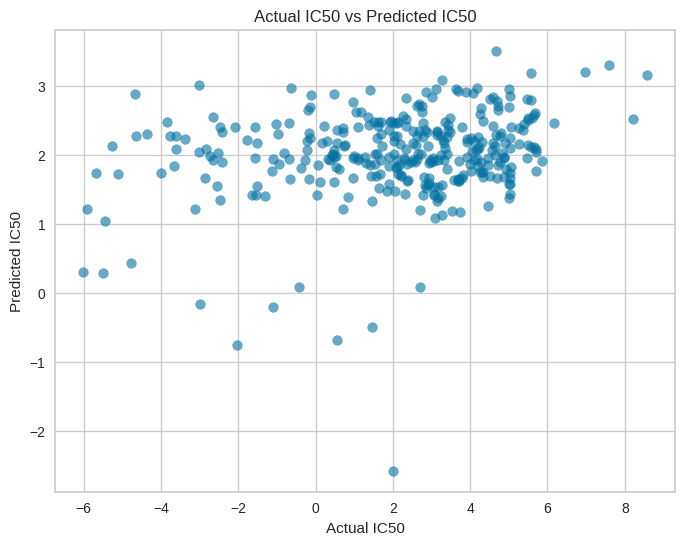

In [30]:
import matplotlib.pyplot as plt

# Plot Actual IC50 vs Predicted IC50
plt.figure(figsize=(8, 6))
plt.scatter(df_combined['LN_IC50'], df_combined['Predicted_IC50'], alpha=0.6)
plt.title('Actual IC50 vs Predicted IC50')
plt.xlabel('Actual IC50')
plt.ylabel('Predicted IC50')
plt.grid(True)
plt.show()

## Noting correlation coefficient

In [31]:
import numpy as np

# Calculate the correlation coefficient
correlation_coef = np.corrcoef(df_combined['LN_IC50'], df_combined['Predicted_IC50'])[0, 1]
print(f"Correlation Coefficient: {correlation_coef}")

Correlation Coefficient: 0.24572802558076937
